# Exploratory Data Analysis of Simulated Customer Spending Habits
## Advanced Version with Detailed Explanations

This notebook demonstrates a complete data analysis workflow:
1. Synthetic data generation
2. Data inspection and cleaning checks
3. Descriptive statistics
4. Central tendency analysis
5. Correlation analysis
6. Data visualization
7. Final insights

The goal is to understand customer spending behavior using simulated data.

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## Step 2: Generate Synthetic Dataset
We generate 500 customer records including:
- Age (18–70)
- Annual Income ($30,000–$150,000)
- Transaction Amount ($10–$500)
- Customer Segment (A, B, C)

In [2]:
num_records = 500

# Generate Age
ages = np.random.randint(18, 71, num_records)

# Generate Annual Income
annual_income = np.random.normal(75000, 20000, num_records)
annual_income = np.clip(annual_income, 30000, 150000)

# Generate Transaction Amount influenced by income
transaction_amount = np.random.normal(200, 80, num_records) + (annual_income / 1000) * 0.4
transaction_amount = np.clip(transaction_amount, 10, 500)

# Customer Segments
segments = np.random.choice(['A', 'B', 'C'], size=num_records, p=[0.4, 0.35, 0.25])

# Create DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Annual_Income': annual_income,
    'Transaction_Amount': transaction_amount,
    'Customer_Segment': segments
})

data.head()

,Age,Annual_Income,Transaction_Amount,Customer_Segment
0,56,50994.071859,261.810350,A
1,69,68309.975283,169.264485,A
2,46,65501.093777,241.141779,A
3,32,61933.415349,164.342732,B
4,60,110309.084806,195.202210,A


## Step 3: Data Inspection

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int32  
 1   Annual_Income       500 non-null    float64
 2   Transaction_Amount  500 non-null    float64
 3   Customer_Segment    500 non-null    str    
dtypes: float64(2), int32(1), str(1)
memory usage: 13.8 KB


In [4]:
data.isnull().sum()

Age                   0
Annual_Income         0
Transaction_Amount    0
Customer_Segment      0
dtype: int64

## Step 4: Descriptive Statistics
We calculate summary statistics for numerical columns.

In [5]:
data[['Age', 'Annual_Income', 'Transaction_Amount']].describe()

,Age,Annual_Income,Transaction_Amount
count,500.000000,500.000000,500.000000
mean,44.732000,74664.213744,239.773874
std,15.239707,19690.474473,79.285460
min,18.000000,30000.000000,10.000000
25%,32.000000,60982.398927,183.288721
50%,45.000000,74600.821981,238.946951
75%,57.000000,87684.690285,292.087117
max,70.000000,136577.616169,436.716693


## Step 5: Central Tendency (Mean & Median)

In [6]:
print('Mean Age:', data['Age'].mean())
print('Median Age:', data['Age'].median())

print('Mean Transaction:', data['Transaction_Amount'].mean())
print('Median Transaction:', data['Transaction_Amount'].median())

Mean Age: 44.732
Median Age: 45.0
Mean Transaction: 239.77387448470242
Median Transaction: 238.94695060589413


## Step 6: Correlation Analysis
We examine the relationship between income and transaction amount.

In [7]:
correlation = data['Annual_Income'].corr(data['Transaction_Amount'])
print('Correlation between Annual Income and Transaction Amount:', correlation)

Correlation between Annual Income and Transaction Amount: 0.07572916769143374


## Step 7: Distribution of Transaction Amount

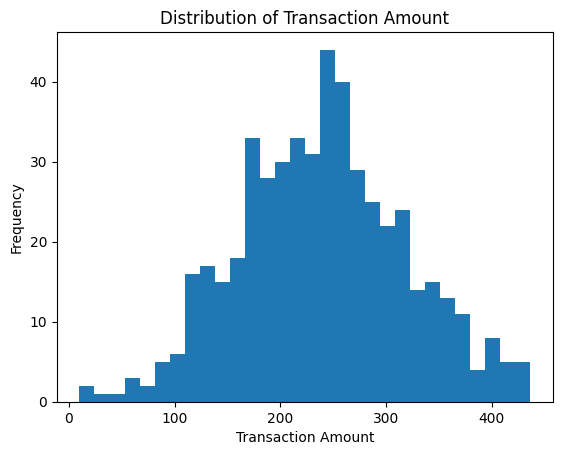

In [8]:
plt.figure()
plt.hist(data['Transaction_Amount'], bins=30)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

## Step 8: Income vs Transaction Amount

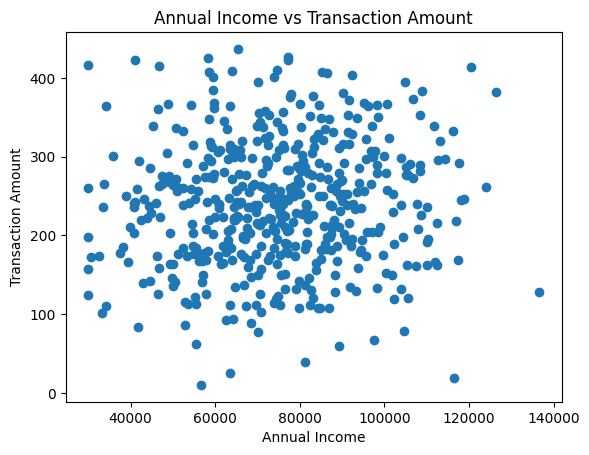

In [9]:
plt.figure()
plt.scatter(data['Annual_Income'], data['Transaction_Amount'])
plt.title('Annual Income vs Transaction Amount')
plt.xlabel('Annual Income')
plt.ylabel('Transaction Amount')
plt.show()

## Final Insights

- Most transaction amounts cluster within a moderate range, indicating consistent purchasing behavior.
- The positive correlation suggests that higher-income customers tend to spend slightly more per transaction.
- Age distribution appears balanced across working-age individuals.
- No missing values were found, meaning the dataset is clean and ready for analysis.